# Байесовская регрессия

Функция, строящая плотности распределения весов с полученными коэффициентами:

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import random
#Дано: x, y, N, d =1, m=0, sigma = 1
#Сделать: построить апостериорное распределение весов в зависимости от числа объектов, которые используются для обучения
def apostor(x, y, N,   d = 1, m = 0, sigma = 1):
    #Подсчёт коэфф-ов по формулам, которые получились
    e1 = -N / (2 * sigma * sigma) - 1 / (2 * d * d)  # w0^2
    sum_x2 = 0
    for i in range (N):
        sum_x2 += x[i] * x[i]
    e2 = -1 / (2 * sigma * sigma) * sum_x2 - 1 / (2 * d * d) # w1^2
    sum_x = 0
    for i in range (N):
        sum_x += x[i]
    e3 = 1 / (sigma * sigma) * sum_x # w0w1
    sum_y = 0
    for i in range (N):
        sum_y += y[i]
    e4 = 1 / (sigma * sigma) * sum_y + m / (d * d) # w0
    sum_xy = 0
    for i in range (N):
        sum_xy += x[i] * y[i]
    e5 = 1 / (sigma * sigma) * sum_xy + m / (d * d) # w1
    #вычисление Ро и сигма по формулам, которые получились
    rho = e3 / (2 * np.sqrt(e1 * e2))
    sigma1 = 1 / np.sqrt(-e1 * 2 * (1 - rho * rho))
    sigma2 = 1 / np.sqrt(-e2 * 2 * (1 - rho * rho))
    #Подсчитываем a, b, c по данным формулам
    a = -1 / (2 * (1 - rho * rho)) * 1 / (sigma1 * sigma1)
    b = -1 / (2 * (1 - rho * rho)) * 1 / (sigma2 * sigma2)
    c = 1 / (2 * (1 - rho * rho)) * 2 * rho / (sigma1 * sigma2)
    #составляем систему уравнений с мю1 и мю2
    A = [[-2 * a, -c],
         [-2 * b, -c]]
    B = [e4, e5]
    #получаем мю
    mu = np.linalg.solve(A, B)
    #определяем ковариацию для подсчёта апостериорного распределения
    cov = [[sigma1 * sigma1, rho], [rho, sigma2 * sigma2]]
    #считаем распределение
    w = np.random.multivariate_normal(mu, cov, N).T
    
    return w

Задаем данные, используя уравнение y=5*x + 6

In [279]:
N = 700
x = np.linspace(1, 3, N)
y_true = 5 * x + 6
#Добавляем шум к данным
y = y_true + np.random.normal(0,1, N)

Просемлируем несколько значений весов из полученного апостериорного распределения и построим предсказания (линии регересии на некотором интервале).

C:\Users\A13C~1\AppData\Local\Temp/ipykernel_13504/2530271444.py:42: RuntimeWarning: covariance is not positive-semidefinite.
  w = np.random.multivariate_normal(mu, cov, N).T


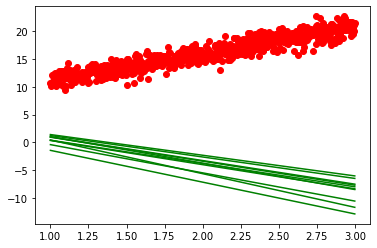

In [280]:
#Полученное распределение
res_pred = apostor(x, y, N)
#построим десять линий
for i in range (10):
    #выбираем случайные из полученных весов
    r = random.randrange(N-1)
    #составляем предсказание
    y_pred = res_pred[0][r] + x * res_pred[1][r]
    #линия регрессии
    plt.plot(x, y_pred, color='green')
#распределение y_true
plt.scatter(x, y, color='red')
plt.show()

 По мере увеличения количества точек данных неопределенность должна уменьшаться, что свидетельствует о более высоком уровне достоверности в оценке.